# 栈与队列

## [有效的括号](https://leetcode-cn.com/problems/valid-parentheses/)

给定一个只包括 '('，')'，'{'，'}'，'['，']' 的字符串`s`，判断字符串是否有效。

有效字符串需满足：

- 左括号必须用相同类型的右括号闭合。
- 左括号必须以正确的顺序闭合。
 
```
示例 1：
输入：s = "()"
输出：true

示例 2：
输入：s = "()[]{}"
输出：true

示例 3：
输入：s = "(]"
输出：false

示例 4：
输入：s = "([)]"
输出：false

示例 5：
输入：s = "{[]}"
输出：true
```

In [1]:
class Solution:
    def isValid(self, s):
        stack = []
        
        for item in s:
            if item == '(':
                stack.append(')')
            elif item == '[':
                stack.append(']')
            elif item == '{':
                stack.append('}')
            elif not stack or stack[-1] != item:
                return False
            else:
                stack.pop()
        
        return True if not stack else False

## [删除字符串中的所有相邻重复项](https://leetcode-cn.com/problems/remove-all-adjacent-duplicates-in-string/)

给出由小写字母组成的字符串`S`，重复项删除操作会选择两个相邻且相同的字母，并删除它们。

在`S`上反复执行重复项删除操作，直到无法继续删除。

在完成所有重复项删除操作后返回最终的字符串。答案保证唯一。

```
示例：

输入："abbaca"
输出："ca"
解释：
例如，在 "abbaca" 中，我们可以删除 "bb" 由于两字母相邻且相同，这是此时唯一可以执行删除操作的重复项。之后我们得到字符串 "aaca"，其中又只有 "aa" 可以执行重复项删除操作，所以最后的字符串为 "ca"。
```

In [2]:
class Solution:
    def removeDuplicates(self, s):
        res = []
        for w in s:
            if len(res) > 0 and w == res[-1]:
                res.pop()
            else:
                res.append(w)
        return ''.join(res)

## [逆波兰表达式求值](https://leetcode-cn.com/problems/evaluate-reverse-polish-notation/)

根据*逆波兰表示法*，求表达式的值。

有效的算符包括`+、-、*、/`。每个运算对象可以是整数，也可以是另一个逆波兰表达式。

**注意**两个整数之间的除法只保留整数部分。

可以保证给定的逆波兰表达式总是有效的。换句话说，表达式总会得出有效数值且不存在除数为 0 的情况。

```
示例 1：
输入：tokens = ["2","1","+","3","*"]
输出：9
解释：该算式转化为常见的中缀算术表达式为：((2 + 1) * 3) = 9

示例 2：
输入：tokens = ["4","13","5","/","+"]
输出：6
解释：该算式转化为常见的中缀算术表达式为：(4 + (13 / 5)) = 6

示例 3：
输入：tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]
输出：22
解释：该算式转化为常见的中缀算术表达式为：
  ((10 * (6 / ((9 + 3) * -11))) + 17) + 5
= ((10 * (6 / (12 * -11))) + 17) + 5
= ((10 * (6 / -132)) + 17) + 5
= ((10 * 0) + 17) + 5
= (0 + 17) + 5
= 17 + 5
= 22
```

**提示**：

- 1 <= tokens.length <= 104
- tokens[i] 是一个算符（"+"、"-"、"*" 或 "/"），或是在范围 [-200, 200] 内的一个整数
 
**逆波兰表达式**：

逆波兰表达式是一种后缀表达式，所谓后缀就是指算符写在后面。

- 平常使用的算式则是一种中缀表达式，如 ( 1 + 2 ) * ( 3 + 4 ) 。
- 该算式的逆波兰表达式写法为 ( ( 1 2 + ) ( 3 4 + ) * ) 。

逆波兰表达式主要有以下两个优点：

- 去掉括号后表达式无歧义，上式即便写成 1 2 + 3 4 + * 也可以依据次序计算出正确结果。
- 适合用栈操作运算：遇到数字则入栈；遇到算符则取出栈顶两个数字进行计算，并将结果压入栈中

In [3]:
class Solution:
    def evalRPN(self, tokens):
        res = []
        for i in tokens:
            if i not in ['+', '-', '*', '/']:
                res.append(i)
            else:
                a = res.pop()
                b = res.pop()
                res.append(str(int(eval(b+i+a))))
        return int(res.pop())

## [滑动窗口最大值](https://leetcode-cn.com/problems/sliding-window-maximum/)

给你一个整数数组`nums`，有一个大小为`k`的滑动窗口从数组的最左侧移动到数组的最右侧。你只可以看到在滑动窗口内的`k`个数字。滑动窗口每次只向右移动一位。

返回`滑动窗口中的最大值`。

```
示例 1：
输入：nums = [1,3,-1,-3,5,3,6,7], k = 3
输出：[3,3,5,5,6,7]
解释：
滑动窗口的位置                最大值
---------------               -----
[1  3  -1] -3  5  3  6  7       3
 1 [3  -1  -3] 5  3  6  7       3
 1  3 [-1  -3  5] 3  6  7       5
 1  3  -1 [-3  5  3] 6  7       5
 1  3  -1  -3 [5  3  6] 7       6
 1  3  -1  -3  5 [3  6  7]      7

示例 2：
输入：nums = [1], k = 1
输出：[1]
```

In [4]:
from collections import deque
class Solution:
    def maxSlidingWindow(self, nums, k):
        if not nums or 0 < k > len(nums):
            return None

        dq = deque()
        for i in range(k-1):
            while dq and nums[i] > nums[dq[-1]]:
                dq.pop()
            dq.append(i)
        
        res = []
        for i in range(k-1, len(nums)):
            while dq and nums[i] > nums[dq[-1]]:
                dq.pop()
            dq.append(i)
            if dq[0] == i - k:
                dq.popleft()
            res.append(nums[dq[0]])
        
        return res

##  [前 K 个高频元素](https://leetcode-cn.com/problems/top-k-frequent-elements/)

给你一个整数数组`nums`和一个整数`k`，请你返回其中出现频率前`k`高的元素。你可以按`任意顺序`返回答案。

```
示例 1:
输入: nums = [1,1,1,2,2,3], k = 2
输出: [1,2]

示例 2:
输入: nums = [1], k = 1
输出: [1]
```

In [5]:
import heapq
class Solution:
    def topKFrequent(self, nums, k):
        cnt = defaultdict(int)
        for i in nums:
            cnt[i] += 1
        
        mi = []
        for word, ct in cnt.items():
            heapq.heappush(mi, (ct, word))
            if len(mi) > k:
                heapq.heappop(mi)
        
        res = [0] * k
        for i in range(k-1, -1, -1):
            res[i] = heapq.heappop(mi)[1]
        
        return res

# 单调栈

##  [每日温度](https://leetcode-cn.com/problems/daily-temperatures/)

给定一个整数数组`temperatures`，表示每天的温度，返回一个数组`answer`，其中`answer[i]`是指在第`i`天之后，才会有更高的温度。如果气温在这之后都不会升高，请在该位置用`0`来代替。

```
示例 1:
输入: temperatures = [73,74,75,71,69,72,76,73]
输出: [1,1,4,2,1,1,0,0]

示例 2:
输入: temperatures = [30,40,50,60]
输出: [1,1,1,0]

示例 3:
输入: temperatures = [30,60,90]
输出: [1,1,0]
```

In [6]:
class Solution:
    def dailyTemperatures(self, temperatures):
        res = [0] * len(temperatures)
        dq = [0]

        for i in range(1, len(temperatures)):
            if temperatures[dq[-1]] >= temperatures[i]:
                dq.append(i)
            else:
                while dq and temperatures[dq[-1]] < temperatures[i]:
                    res[dq[-1]] = i - dq[-1]
                    dq.pop()
                dq.append(i)
        
        return res

## [下一个更大元素 I](https://leetcode-cn.com/problems/next-greater-element-i/)

`nums1`中数字`x`的`下一个更大元素`是指`x`在`nums2`中对应位置`右侧`的`第一个`比`x`大的元素。

给你两个`没有重复元素`的数组`nums1`和`nums2`，下标从`0`开始计数，其中`nums1`是`nums2`的子集。

对于每个`0 <= i < nums1.length`，找出满足`nums1[i] == nums2[j]`的下标`j`，并且在`nums2 `确定`nums2[j]`的`下一个更大元素`。如果不存在下一个更大元素，那么本次查询的答案是`-1`。

返回一个长度为`nums1.length`的数组`ans`作为答案，满足`ans[i]`是如上所述的`下一个更大元素`。

```
示例 1：
输入：nums1 = [4,1,2], nums2 = [1,3,4,2].
输出：[-1,3,-1]
解释：nums1 中每个值的下一个更大元素如下所述：
- 4 ，用加粗斜体标识，nums2 = [1,3,4,2]。不存在下一个更大元素，所以答案是 -1 。
- 1 ，用加粗斜体标识，nums2 = [1,3,4,2]。下一个更大元素是 3 。
- 2 ，用加粗斜体标识，nums2 = [1,3,4,2]。不存在下一个更大元素，所以答案是 -1 。

示例 2：
输入：nums1 = [2,4], nums2 = [1,2,3,4].
输出：[3,-1]
解释：nums1 中每个值的下一个更大元素如下所述：
- 2 ，用加粗斜体标识，nums2 = [1,2,3,4]。下一个更大元素是 3 。
- 4 ，用加粗斜体标识，nums2 = [1,2,3,4]。不存在下一个更大元素，所以答案是 -1 。
```

In [7]:
class Solution:
    def nextGreaterElement(self, nums1, nums2):
        res = [-1] * len(nums1)
        dq = [0]

        for i in range(1, len(nums2)):

            while dq and nums2[dq[-1]] < nums2[i]:
                if nums2[dq[-1]] in nums1:
                    idx = nums1.index(nums2[dq[-1]])
                    res[idx] = nums2[i]
                dq.pop()
            dq.append(i)
        
        return res

## [下一个更大元素 II](https://leetcode-cn.com/problems/next-greater-element-ii/)

给定一个循环数组`nums`（`nums[nums.length - 1]`的下一个元素是`nums[0]`），返回`nums`中每个元素的`下一个更大元素`。

数字`x`的`下一个更大的元素`是按数组遍历顺序，这个数字之后的第一个比它更大的数，这意味着你应该循环地搜索它的下一个更大的数。如果不存在，则输出`-1`。

```
示例 1:
输入: nums = [1,2,1]
输出: [2,-1,2]
解释: 第一个 1 的下一个更大的数是 2；
数字 2 找不到下一个更大的数； 
第二个 1 的下一个最大的数需要循环搜索，结果也是 2。

示例 2:

输入: nums = [1,2,3,4,3]
输出: [2,3,4,-1,4]
```

In [8]:
class Solution:
    def nextGreaterElements(self, nums):
        stack = []
        results = [-1] * len(nums)
        for i in range(len(nums)-1, -1, -1):
            stack.append(nums[i])
        for i in range(len(nums)-1, -1, -1):
            while stack and stack[-1] <= nums[i]:
                stack.pop()
            if stack:
                results[i] = stack[-1]
            stack.append(nums[i])
        return results


## [接雨水](https://leetcode-cn.com/problems/trapping-rain-water/)

给定`n`个非负整数表示每个宽度为`1`的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。
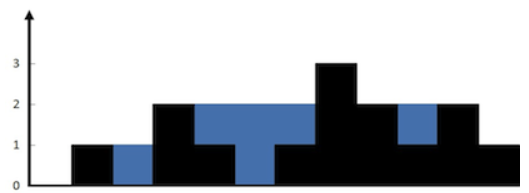
```
示例 1：
输入：height = [0,1,0,2,1,0,1,3,2,1,2,1]
输出：6
解释：上面是由数组 [0,1,0,2,1,0,1,3,2,1,2,1] 表示的高度图，在这种情况下，可以接 6 个单位的雨水（蓝色部分表示雨水）。 

示例 2：
输入：height = [4,2,0,3,2,5]
输出：9
```

In [9]:
class Solution:
    def trap(self, height):
        max_s = 0
        dq = [0]
        for i in range(len(height)):
            if height[i] < height[dq[-1]]:
                dq.append(i)
            
            elif height[i] == height[dq[-1]]:
                dq.pop()
                dq.append(i)
            else:
                while dq and height[i] >= height[dq[-1]]:
                    mid = height[dq[-1]]
                    dq.pop()
                    if dq:
                        right = height[i]
                        left = height[dq[-1]]
                        h = min(right, left) - mid
                        w = i - dq[-1] - 1
                        max_s += h * w
                dq.append(i)
        return max_s

## [柱状图中最大的矩形](https://leetcode-cn.com/problems/largest-rectangle-in-histogram/)

给定`n`个非负整数，用来表示柱状图中各个柱子的高度。每个柱子彼此相邻，且宽度为`1`。

求在该柱状图中，能够勾勒出来的矩形的最大面积。

```
示例 1:
输入：heights = [2,1,5,6,2,3]
输出：10
解释：最大的矩形为图中红色区域，面积为 10

示例 2：
输入： heights = [2,4]
输出： 4
```

In [10]:
class Solution:
    def largestRectangleArea(self, heights):
        # Monotonic Stack
        '''
        找每个柱子左右侧的第一个高度值小于该柱子的柱子
        单调栈：栈顶到栈底：从大到小（每插入一个新的小数值时，都要弹出先前的大数值）
        栈顶，栈顶的下一个元素，即将入栈的元素：这三个元素组成了最大面积的高度和宽度
        情况一：当前遍历的元素heights[i]大于栈顶元素的情况
        情况二：当前遍历的元素heights[i]等于栈顶元素的情况
        情况三：当前遍历的元素heights[i]小于栈顶元素的情况
        '''

        # 输入数组首尾各补上一个0（与42.接雨水不同的是，本题原首尾的两个柱子可以作为核心柱进行最大面积尝试
        heights.insert(0, 0)
        heights.append(0)
        stack = [0]
        result = 0
        for i in range(1, len(heights)):
            # 情况一
            if heights[i] > heights[stack[-1]]:
                stack.append(i)
            # 情况二
            elif heights[i] == heights[stack[-1]]:
                stack.pop()
                stack.append(i)
            # 情况三
            else:
                # 抛出所有较高的柱子
                while stack and heights[i] < heights[stack[-1]]:
                    # 栈顶就是中间的柱子，主心骨
                    mid_index = stack[-1]
                    stack.pop()
                    if stack:
                        left_index = stack[-1]
                        right_index = i
                        width = right_index - left_index - 1
                        height = heights[mid_index]
                        result = max(result, width * height)
                stack.append(i)
        return result